In [1]:
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 잠재 의미 분석

In [2]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi()
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/data/patents.xlsx')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns, min_df=10)
dtm = cv.fit_transform(df.abstract)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


고빈도 단어 보기

In [5]:
word_count = pd.DataFrame({
    'word': cv.get_feature_names_out(),
    'count': dtm.sum(axis=0).flat
})

word_count.sort_values('count', ascending=False).head(20)

,word,count
145,샴푸,972
83,물,737
92,발명,671
262,조성,615
137,상기,485
80,모발,475
286,추출물,474
315,포함,447
114,부,421
66,량,362


SVD

In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
doc_emb = svd.fit_transform(dtm)

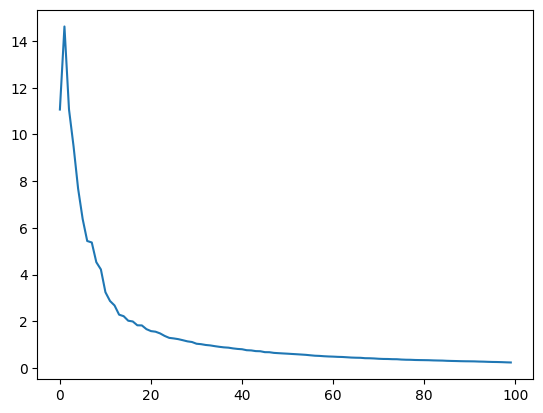

In [7]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)

## 단어임베딩

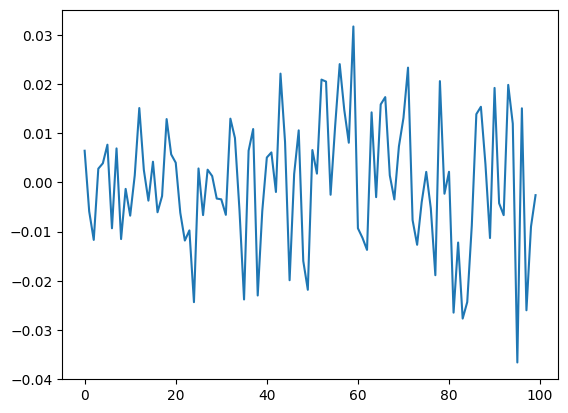

In [8]:
word_emb = svd.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('윤기')

plt.plot(word_emb[i])

## 코사인 유사도

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

탄력
반
조
폴리쿼터늄
구체
베타
혼합물
성물
건조
케어


# 시각화

In [10]:
indices = []
target = ['모발', '손상', '두피', '모공',
          '용기', '내용물']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

모발 80
손상 159
두피 62
모공 78
용기 206
내용물 47


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [11]:
!pip install adjusttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from adjustText import adjust_text

In [13]:
#!apt install fonts-nanum
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [14]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt

In [15]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [16]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truet

In [17]:
# from matplotlib import font_manager
# for font in font_manager.fontManager.ttflist:
#     if 'Nanum' in font.name:
#         print(font.name, font.fname)

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

NanumGothic


/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__in

6

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kw

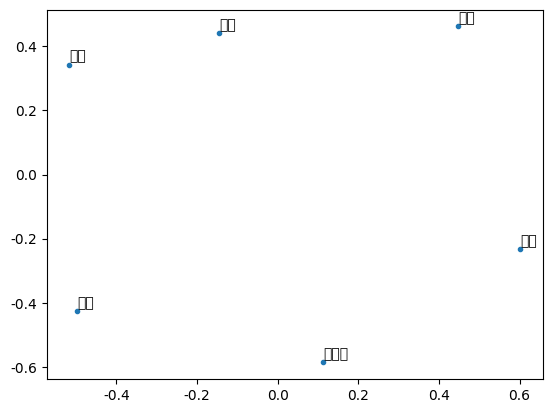

In [18]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [19]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


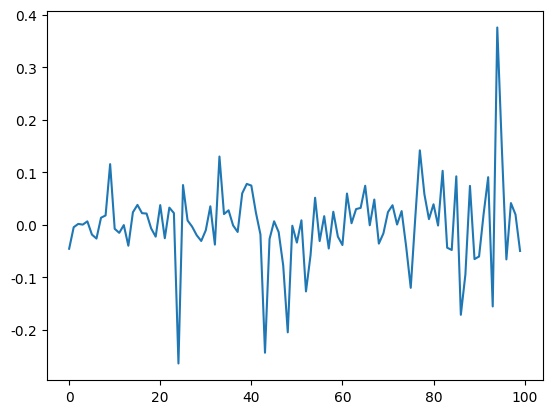

In [20]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()
rot = rotator.fit_transform(word_emb)

plt.plot(rot[i])

In [23]:
t = np.argmax(rot[i])

topic_words_idx = np.argsort(rot[:, t])

for j in topic_words_idx[-1:-11:-1]:
    print(words[j])

내용물
통
디
물질
스펜서
특징
저장
유지
상태
린스
